In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv('best_mlp-tests.csv')
df

,Test ID,First Layer Neurons,Second Layer Neurons,Learning Rate,Activation Function,Accuracy,Precision,Recall,F1-Score
0,0,10,3,0.300,logistic,85.241940,88.200425,87.124255,85.998497
1,1,10,3,0.300,relu,61.795955,47.940234,52.077468,46.261636
2,2,10,3,0.300,tanh,80.098312,73.454565,73.913932,72.064352
3,3,10,3,0.030,logistic,87.122786,90.476219,89.211933,88.643096
4,4,10,3,0.030,relu,87.335929,90.156700,88.930225,88.050781
...,...,...,...,...,...,...,...,...,...
697,697,15,15,0.030,relu,86.461642,89.170759,88.542693,87.205045
698,698,15,15,0.030,tanh,86.152900,89.663682,88.109013,87.408358
699,699,15,15,0.003,logistic,89.113618,91.759328,90.729327,90.131259
700,700,15,15,0.003,relu,88.033525,91.236137,89.892113,89.280161


<Axes: xlabel='Second Layer Neurons', ylabel='Accuracy'>

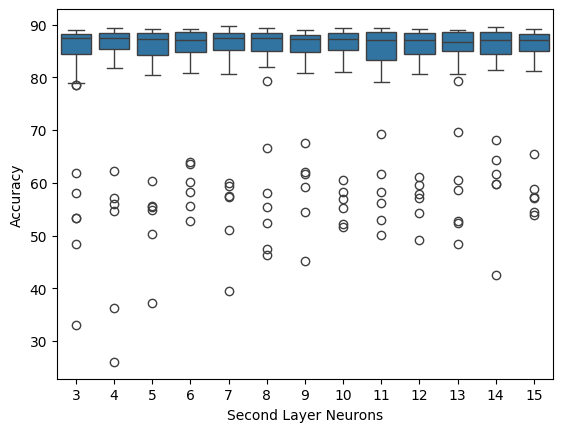

In [33]:
from scipy import stats
df = df.sort_values(by='Accuracy')


sns.boxplot(data=df, y='Accuracy', x='Second Layer Neurons')

Pre Outlier Shape: (702, 9)
Pos Outlier Shape: (602, 9)


<Axes: xlabel='Second Layer Neurons', ylabel='Accuracy'>

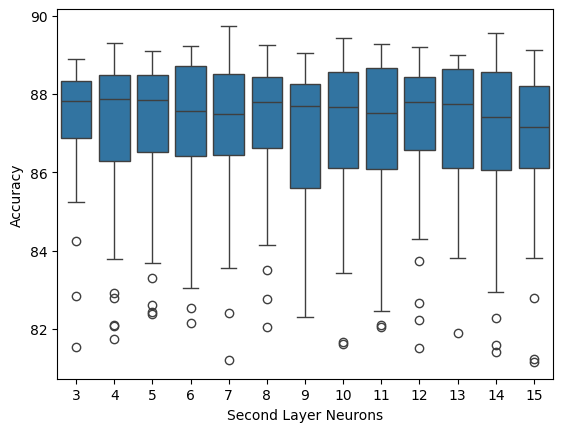

In [30]:
from scipy import stats
df = df.sort_values(by='Accuracy')



print(f'Pre Outlier Shape: {df.shape}')
df_no_outliers = df.copy()

'''
upper = df['Accuracy'].mean() + (3 * df['Accuracy'].std())
lower = df['Accuracy'].mean() - (3 * df['Accuracy'].std())

ex_upper = pd.Series(df[df['Accuracy'] > upper].index)
ex_lower = pd.Series(df[df['Accuracy'] < lower].index)


if len(ex_lower) > 0:
    df_no_outliers.drop(ex_lower.values, inplace= True, errors='ignore')
if len(ex_upper) > 0:
    df_no_outliers.drop(ex_upper.values, inplace= True, errors='ignore')

'''


mad = 1.4826 * np.median(np.absolute(df_no_outliers['Accuracy'] - df_no_outliers['Accuracy'].median()))
upper = df_no_outliers['Accuracy'].median() + 3*mad
lower = df_no_outliers['Accuracy'].median() - 3*mad
ex_upper = pd.Series(df[df['Accuracy'] > upper].index)
ex_lower = pd.Series(df[df['Accuracy'] < lower].index)
if len(ex_lower) > 0:
    df_no_outliers.drop(ex_lower.values, inplace= True, errors='ignore')
if len(ex_upper) > 0:
    df_no_outliers.drop(ex_upper.values, inplace= True, errors='ignore')

print(f'Pos Outlier Shape: {df_no_outliers.shape}')

sns.boxplot(data=df_no_outliers, y='Accuracy', x='Second Layer Neurons')

Pre Outlier Shape: (702, 9)
Pos Outlier Shape: (685, 9)


<Axes: xlabel='Second Layer Neurons', ylabel='Accuracy'>

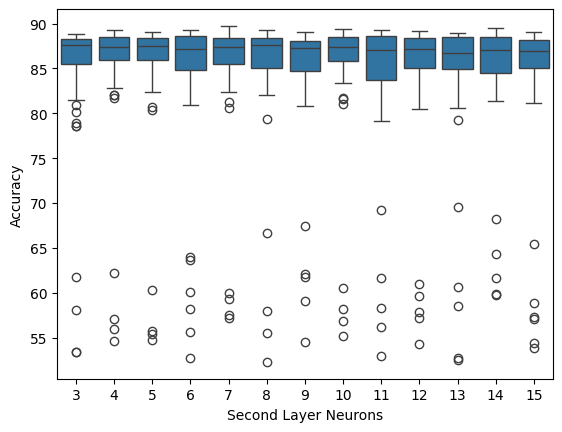

In [31]:
from scipy import stats
df = df.sort_values(by='Accuracy')



print(f'Pre Outlier Shape: {df.shape}')
df_no_outliers = df.copy()

upper = df['Accuracy'].mean() + (3 * df['Accuracy'].std())
lower = df['Accuracy'].mean() - (3 * df['Accuracy'].std())

ex_upper = pd.Series(df[df['Accuracy'] > upper].index)
ex_lower = pd.Series(df[df['Accuracy'] < lower].index)


if len(ex_lower) > 0:
    df_no_outliers.drop(ex_lower.values, inplace= True, errors='ignore')
if len(ex_upper) > 0:
    df_no_outliers.drop(ex_upper.values, inplace= True, errors='ignore')


print(f'Pos Outlier Shape: {df_no_outliers.shape}')
sns.boxplot(data=df_no_outliers, y='Accuracy', x='Second Layer Neurons')